In [13]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from scipy import io as spio
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import *
K.set_image_dim_ordering('th')

# Data Loading and Shaping

In [2]:
random.seed(2018) #setting a random seed so work is reproducible

In [3]:
emnist = spio.loadmat("data/EMNIST/emnist-digits.mat")

In [4]:
#Loading the training and test sets
x_train = emnist["dataset"][0][0][0][0][0][0].astype(np.float32)
y_train = emnist["dataset"][0][0][0][0][0][1]

x_test = emnist["dataset"][0][0][1][0][0][0].astype(np.float32)
y_test = emnist["dataset"][0][0][1][0][0][1]

In [5]:
#Normalizing since 255 is the max value
x_train = x_train/x_train.max()
x_test = x_test/x_train.max()

In [6]:
x_train.shape

(240000, 784)

In [7]:
#Flattening pixels into vectors using order A
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28, order = 'A').astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28, order = 'A').astype('float32')

In [ ]:
#x_train.shape

In [8]:
#One-hot encode the labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
num_classes = y_test.shape[1]

# Building First Model

In [10]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(20, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(20, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(20, (1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
model = larger_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 240000 samples, validate on 40000 samples
Epoch 1/5
240000/240000 [==============================] - 403s 2ms/step - loss: 0.4715 - acc: 0.8464 - val_loss: 0.7150 - val_acc: 0.9550
Epoch 2/5
240000/240000 [==============================] - 426s 2ms/step - loss: 0.1720 - acc: 0.9470 - val_loss: 1.0766 - val_acc: 0.9317
Epoch 3/5
240000/240000 [==============================] - 419s 2ms/step - loss: 0.1289 - acc: 0.9602 - val_loss: 1.0274 - val_acc: 0.9347
Epoch 4/5
240000/240000 [==============================] - 412s 2ms/step - loss: 0.1068 - acc: 0.9675 - val_loss: 2.0984 - val_acc: 0.8684
Epoch 5/5
240000/240000 [==============================] - 401s 2ms/step - loss: 0.0930 - acc: 0.9717 - val_loss: 2.2604 - val_acc: 0.8581
Large CNN Error: 14.19%


# Model Function

In [15]:
def create_model(layers = 2):
    if layers == 1:
        model = Sequential()
        model.add(Conv2D(20, (5, 5), input_shape=(1, 28, 28), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    if layers == 2:
        model = Sequential()
        model.add(Conv2D(20, (5, 5), input_shape=(1, 28, 28), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(20, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    if layers == 3:
        model = Sequential()
        model.add(Conv2D(20, (5, 5), input_shape=(1, 28, 28), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(20, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(20, (2, 2), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    if layers == 4:
        model = Sequential()
        model.add(Conv2D(20, (5, 5), input_shape=(1, 28, 28), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(20, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(20, (2, 2), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(20, (1, 1), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(50, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

In [ ]:
model = create_model(2)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 240000 samples, validate on 40000 samples
Epoch 1/5
240000/240000 [==============================] - 399s 2ms/step - loss: 0.1329 - acc: 0.9606 - val_loss: 0.1926 - val_acc: 0.9880
Epoch 2/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.0387 - acc: 0.9883 - val_loss: 0.1385 - val_acc: 0.9914
Epoch 3/5
240000/240000 [==============================] - 396s 2ms/step - loss: 0.0303 - acc: 0.9909 - val_loss: 0.2011 - val_acc: 0.9873
Epoch 4/5
240000/240000 [==============================] - 396s 2ms/step - loss: 0.0255 - acc: 0.9924 - val_loss: 0.1231 - val_acc: 0.9923
Epoch 5/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.0222 - acc: 0.9934 - val_loss: 0.1242 - val_acc: 0.9922
Large CNN Error: 0.78%


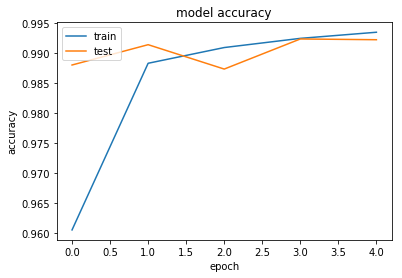

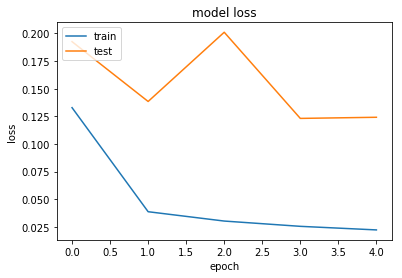

Train on 240000 samples, validate on 40000 samples
Epoch 1/5
240000/240000 [==============================] - 402s 2ms/step - loss: 0.2236 - acc: 0.9301 - val_loss: 0.2697 - val_acc: 0.9832
Epoch 2/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.0725 - acc: 0.9783 - val_loss: 0.1786 - val_acc: 0.9888
Epoch 3/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.0571 - acc: 0.9827 - val_loss: 0.1790 - val_acc: 0.9887
Epoch 4/5
240000/240000 [==============================] - 396s 2ms/step - loss: 0.0489 - acc: 0.9854 - val_loss: 0.1968 - val_acc: 0.9876
Epoch 5/5
240000/240000 [==============================] - 396s 2ms/step - loss: 0.0431 - acc: 0.9871 - val_loss: 0.1542 - val_acc: 0.9903
Large CNN Error: 0.97%


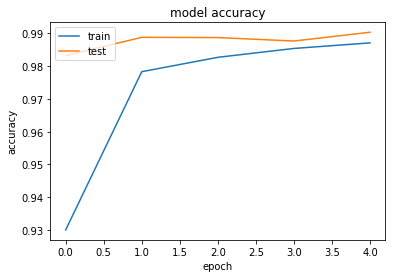

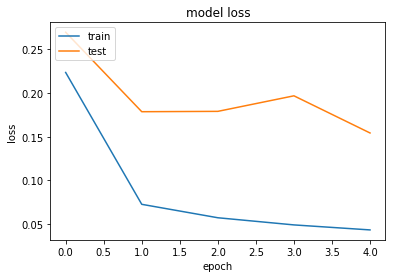

Train on 240000 samples, validate on 40000 samples
Epoch 1/5
240000/240000 [==============================] - 396s 2ms/step - loss: 0.5612 - acc: 0.8132 - val_loss: 1.0408 - val_acc: 0.9341
Epoch 2/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.2053 - acc: 0.9368 - val_loss: 1.7843 - val_acc: 0.8870
Epoch 3/5
240000/240000 [==============================] - 396s 2ms/step - loss: 0.1423 - acc: 0.9567 - val_loss: 2.2645 - val_acc: 0.8589
Epoch 4/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.1135 - acc: 0.9651 - val_loss: 1.9824 - val_acc: 0.8767
Epoch 5/5
240000/240000 [==============================] - 395s 2ms/step - loss: 0.0989 - acc: 0.9700 - val_loss: 2.0409 - val_acc: 0.8728
Large CNN Error: 12.72%


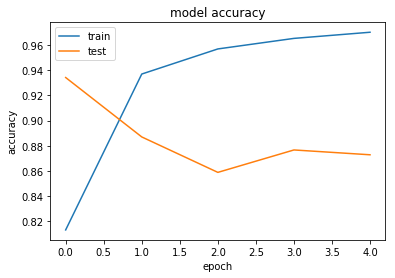

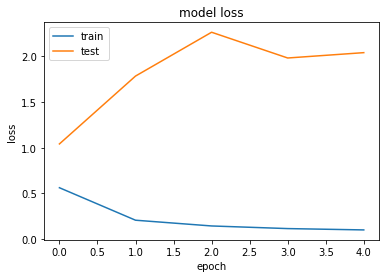

<Figure size 432x288 with 0 Axes>

In [17]:
epoch=5
layers=[2,3,4]
history=History()
for layer in layers:
    model = create_model(layer)
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=200, callbacks=[history])
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("Large CNN Error: %.2f%%" % (100-scores[1]*100))
    
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.savefig('results/plots/acc'+ '%s-%s' % (layer, epoch))
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.savefig('results/plots/loss'+ '%s-%s' % (layer, epoch))
    
    
    data=np.concatenate([history.history['val_loss'],history.history['val_acc'],history.history['loss'],history.history['acc']])
    np.savez_compressed('results/data/'+ '%s-%s' % (layer, epoch), data)

